In [1]:

import matplotlib.pyplot as plt
import np as np
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from yellowbrick.cluster import silhouette_visualizer

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
def shape_parameters(n_clusters):
    return dict(n_clusters=n_clusters)


def run_grid_kmeans(hyper_parameters, X_data):
    clusterer = KMeans()
    grid_search = GridSearchCV(
        estimator=clusterer,
        param_grid=hyper_parameters,
        cv=2
    )
    grid_search.fit(X_data)

    return grid_search


def index_from_value(value_list_primary, value_list_refined):
    indices = []
    for val in value_list_refined:
        indices.append(np.where(value_list_primary == val)[0][0])
    return indices


def get_core_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    core_silhouettes = np.sort(core_silhouettes)[::-1][0:5]
    return index_from_value(silhouette_values, core_silhouettes)


def get_boundary_indices(silhouette_values, pred_labels, core):
    core_silhouettes = silhouette_values[pred_labels == core]
    boundary_silhouettes = list(filter(lambda _silhouette: -.001 < _silhouette < 0.001, core_silhouettes))
    return index_from_value(silhouette_values, boundary_silhouettes)


In [3]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values.ravel()
# images = pd.read_csv("../dataset/raw_images.csv").values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
# y_train = y_train.ravel()

scaler_standard = StandardScaler().fit(X)
X_standard = scaler_standard.transform(X)

scaler_robust = RobustScaler().fit(X)
X_robust = scaler_robust.transform(X)

scaler_minmax = MinMaxScaler().fit(X)
X_minmax = scaler_minmax.transform(X)


In [4]:

kmeans_params = shape_parameters(
    n_clusters=range(2, 4)
)
grid_results = run_grid_kmeans(kmeans_params, X)


In [5]:
labels = grid_results.predict(X)
print(grid_results.best_params_)
print(grid_results.get_params())


{'n_clusters': 3}
{'cv': 2, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__copy_x': True, 'estimator__init': 'k-means++', 'estimator__max_iter': 300, 'estimator__n_clusters': 8, 'estimator__n_init': 10, 'estimator__random_state': None, 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator': KMeans(), 'n_jobs': None, 'param_grid': {'n_clusters': range(2, 4)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


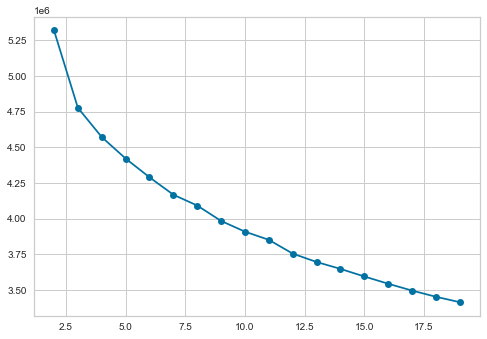

In [6]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

silhouette

In [9]:
km_final = KMeans(
    n_clusters=3,
    init='k-means++'
)
y_km = km_final.fit_predict(X)


0
0
1
1
2
2


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

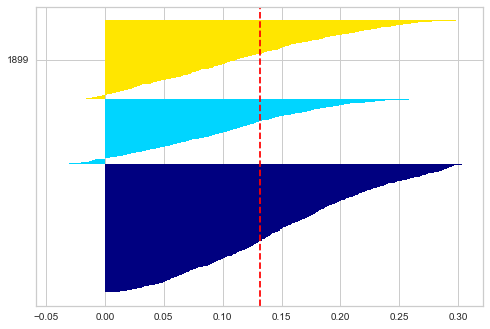

In [14]:

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(
    X,
    y_km,
    metric='euclidean'
)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    print(i)
    print(c)
    c_silhouette_values = silhouette_values[y_km == c]
    c_silhouette_values.sort()
    y_ax_lower = y_ax_upper
    y_ax_upper += len(c_silhouette_values)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_values,
        height=1.0,
        edgecolor='none',
        color=color
    )

yticks.append((y_ax_lower + y_ax_upper) / 2.)
y_ax_lower += len(silhouette_values)
silhouette_average = np.mean(silhouette_values)
plt.axvline(silhouette_average, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()


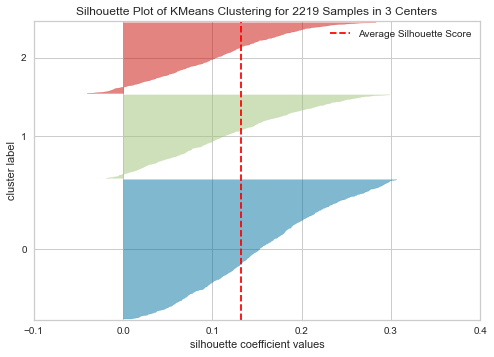

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [15]:
silhouette_visualizer(KMeans(3, random_state=42), X, colors='yellowbrick')


In [ ]:
silhouette_visualizer(KMeans(10, random_state=42), X, colors='yellowbrick')

## scaling


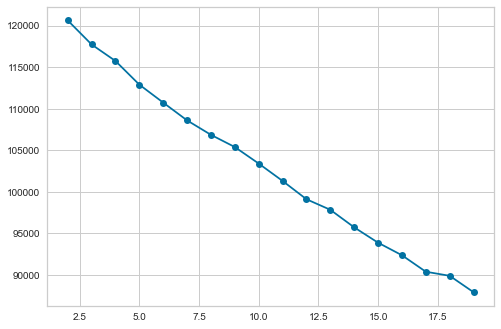

In [17]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_standard)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

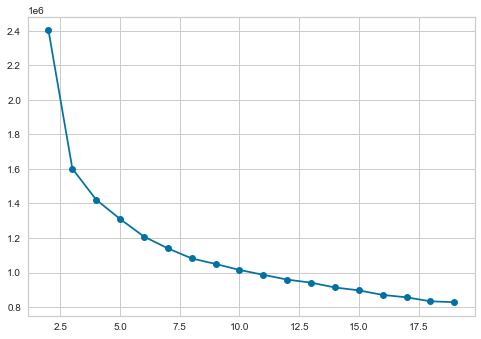

In [18]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_robust)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

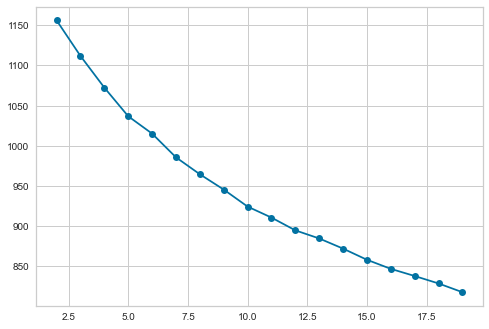

In [19]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(X_minmax)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.show()

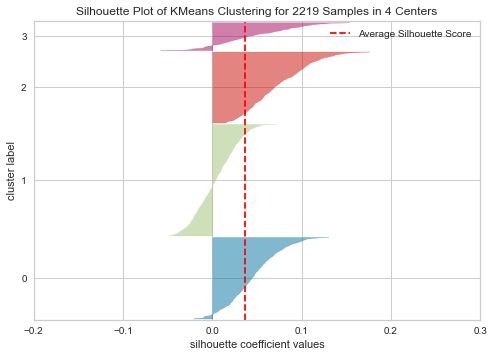

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [21]:

silhouette_visualizer(KMeans(4, random_state=42), X_standard, colors='yellowbrick')


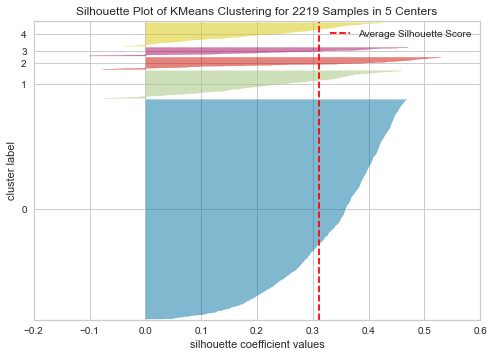

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

In [22]:
silhouette_visualizer(KMeans(5, random_state=42), X_robust, colors='yellowbrick')


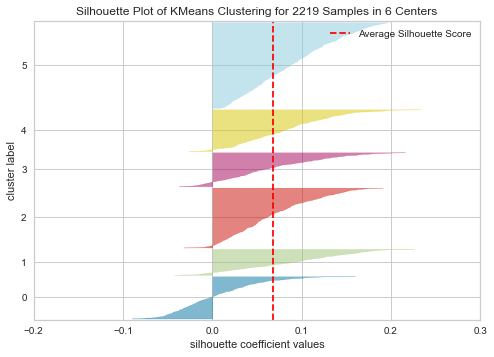

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2219 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

In [25]:
silhouette_visualizer(KMeans(6, random_state=42), X_minmax, colors='yellowbrick')


In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_values = silhouette_samples(
    X,
    y_km,
    metric='euclidean'
)

seek silhouette values at core and boundary

In [ ]:
core_silhouettes = np.sort(silhouette_values)[::-1][0:5]
print(core_silhouettes)

boundary_silhouettes = list(filter(lambda _silhouette: -.0001 < _silhouette < 0.0001, silhouette_values))
print(boundary_silhouettes)

finding the actual samples that are core and boundary

In [ ]:
core_indices = []
for silhouette in core_silhouettes:
    core_indices.append(np.where(silhouette_values == silhouette)[0][0])

print(core_indices)

boundary_indices = []
for silhouette in boundary_silhouettes:
    boundary_indices.append(np.where(silhouette_values == silhouette)[0][0])

print(boundary_indices)

In [ ]:
def display_images(image_collection, image_indices):
    fig, axes = plt.subplots(ncols=len(image_indices))
    for i in range(0, len(image_indices)):
        ax = axes[i]
        ax.imshow(image_collection[image_indices[i]].reshape(32, 32, 3))
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(
            bottom=False, labelbottom=False,
            left=False, labelleft=False
        )
        ax.grid(False)
    plt.show()


display_images(images, core_indices)
display_images(images, boundary_indices)

In [ ]:
silhouette_values = silhouette_samples(
    X,
    y_km,
    metric='euclidean'
)


In [ ]:
indices_at_core_0 = get_core_indices(silhouette_values, y_km, core=0)
print(indices_at_core_0)

In [ ]:

display_images(images, indices_at_core_0)

In [ ]:
indices_at_core_1 = get_core_indices(silhouette_values, y_km, core=1)
print(indices_at_core_1)

In [ ]:

display_images(images, indices_at_core_1)

In [ ]:

indices_at_core_2 = get_core_indices(silhouette_values, y_km, core=2)
print(indices_at_core_2)

In [ ]:

display_images(images, indices_at_core_2)

In [ ]:

indices_at_core_3 = get_core_indices(silhouette_values, y_km, core=3)
print(indices_at_core_3)

In [ ]:

display_images(images, indices_at_core_3)

In [ ]:

indices_at_core_4 = get_core_indices(silhouette_values, y_km, core=4)
print(indices_at_core_4)

In [ ]:

display_images(images, indices_at_core_4)

In [ ]:
indices_at_boundary_1 = get_boundary_indices(silhouette_values=silhouette_values, pred_labels=y_km, core=1)
print(indices_at_boundary_1)

In [ ]:

display_images(images, indices_at_boundary_1[0:2])